<a href="https://colab.research.google.com/github/kirankumarnandan/SupervisedLearning/blob/main/LoanTapLogisticResgression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducation
LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

Personal Loan

EMI Free Loan

Personal Overdraft

Advance Salary Loan

This case study will focus on the underwriting process behind Personal Loan only


## Problem Statment

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

🈁 Data Dictonary

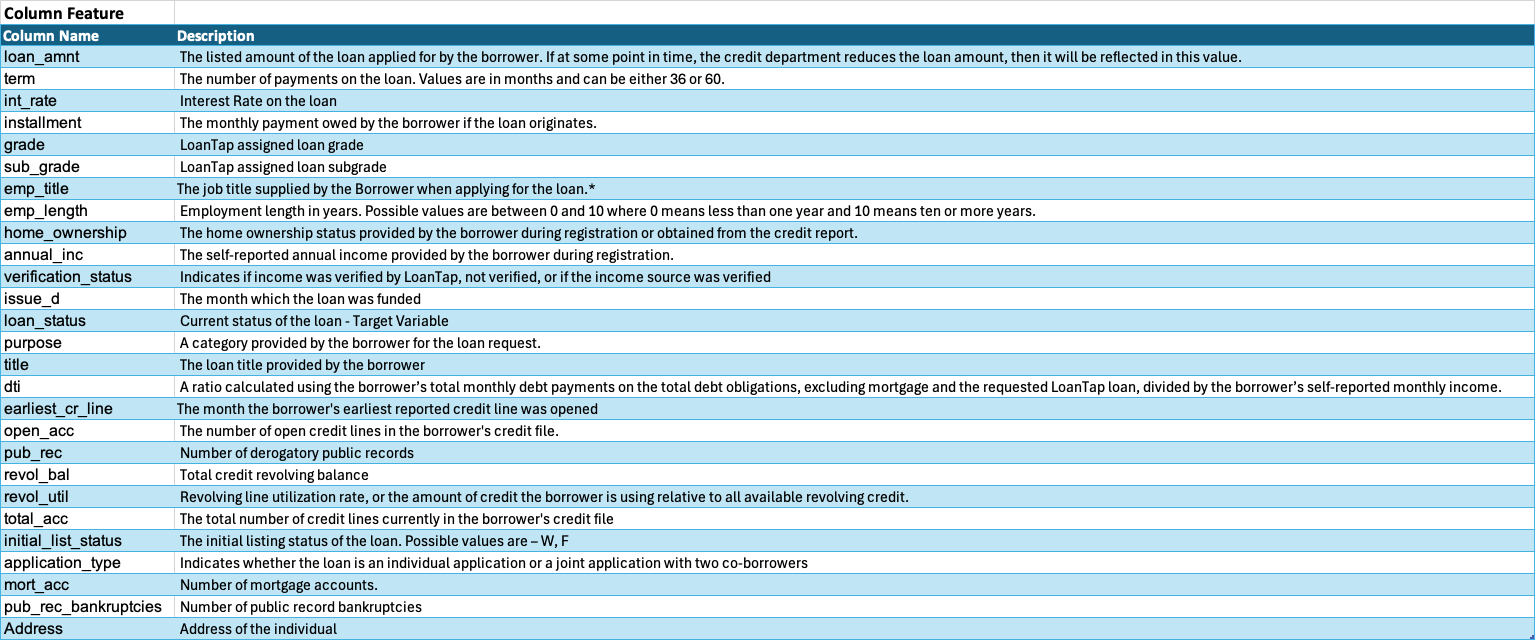

📘 Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import scipy
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
!gdown 1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d

Downloading...
From: https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
To: /content/logistic_regression.csv
100% 100M/100M [00:00<00:00, 155MB/s] 


In [ ]:
df=pd.read_csv('/content/logistic_regression.csv')

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
df.shape

(396030, 27)

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [ ]:
df.describe(include=object).T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


Checking for Duplicates

In [ ]:
df[df.duplicated()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


Dataset has no duplicates

In [ ]:
df.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
mort_acc,37795
emp_title,22927
emp_length,18301
title,1756
pub_rec_bankruptcies,535
revol_util,276
installment,0
int_rate,0
term,0
grade,0


Null Treatment


In [ ]:
df.loc[df['mort_acc'].isna(),'mort_acc'] = 0
df.loc[df['emp_title'].isna(),'emp_title'] = 'Unknown'
df['emp_length']=df['emp_length'].fillna('< 1Year')
df.loc[df['pub_rec_bankruptcies'].isna(),'pub_rec_bankruptcies'] = 0
df.loc[df['revol_util'].isna(),'revol_util'] = 0.0
df.loc[df['title'].isna(),'title'] = 'Unknown'

Handled all null values by above logic

In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
Fully Paid,318357
Charged Off,77673


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,396030,173106,Unknown,22927
emp_length,396030,12,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


Insights

i Most loan is disbursed for 36 months period

ii Most of them have availed "Mortage loan"

iii Most of them have paid the loan

iv Debt consolodation has been highest reason for loans

v. Most of them vaialing loan is "Indivisual"

**Visualization - Univariate Analysis**

In [ ]:
num_vars=list(df.select_dtypes(exclude='object').columns)
num_vars

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

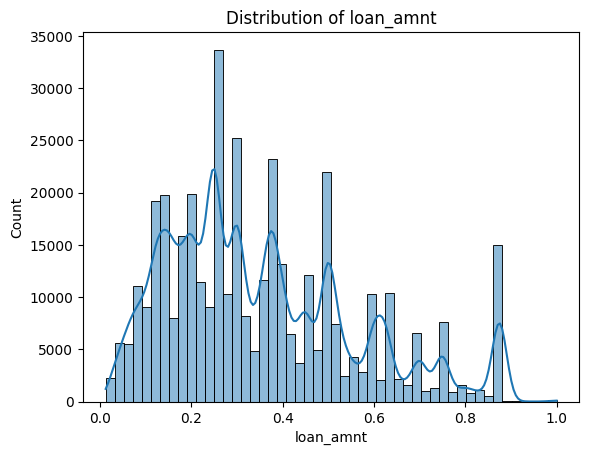

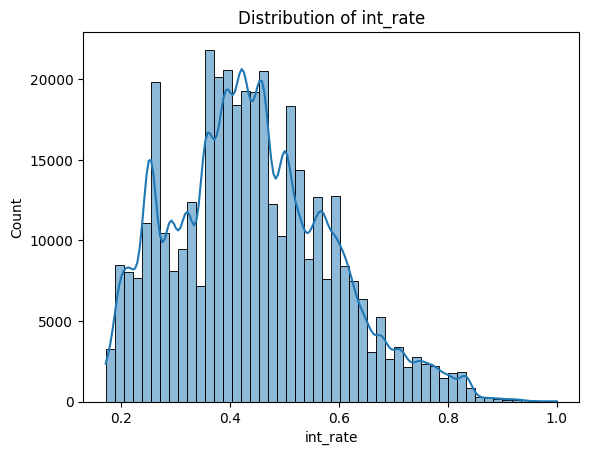

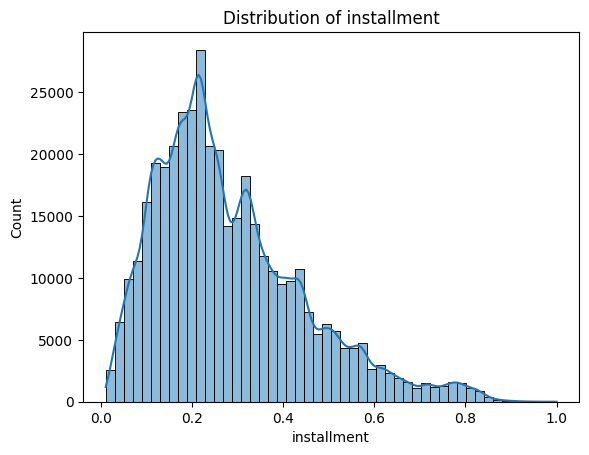

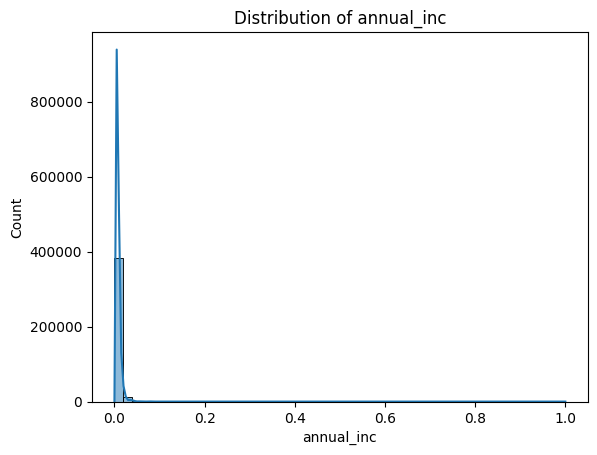

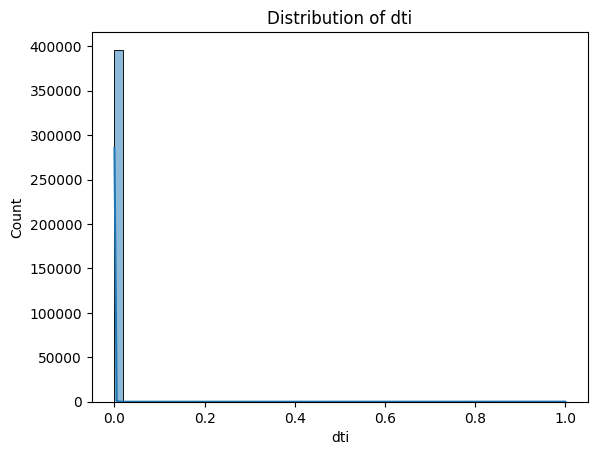

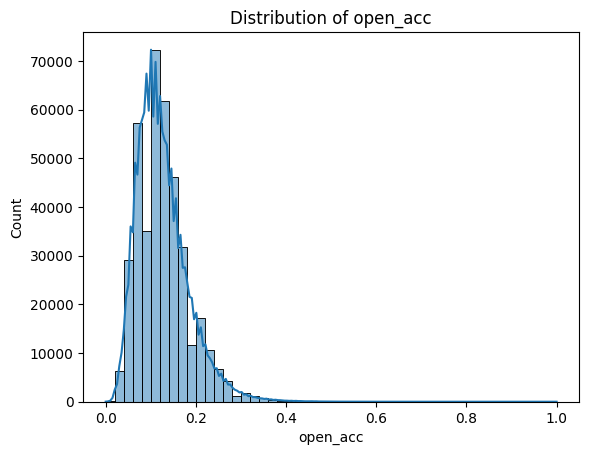

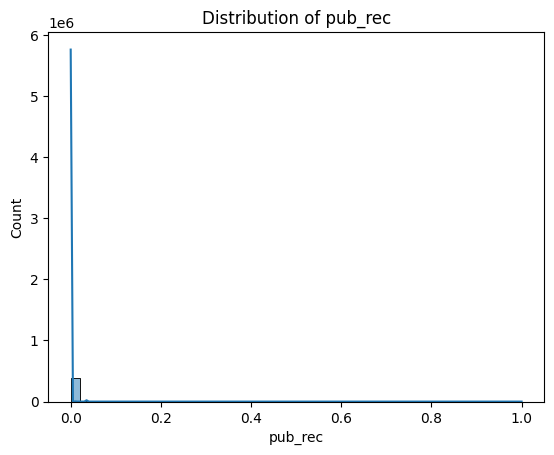

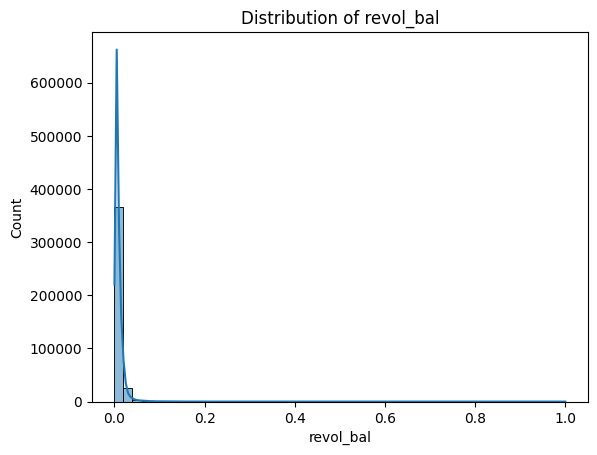

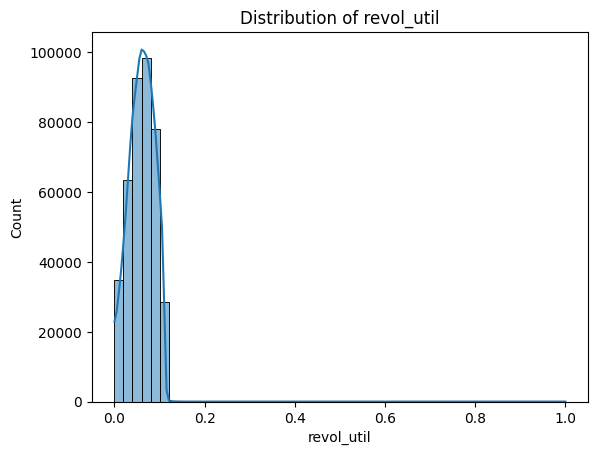

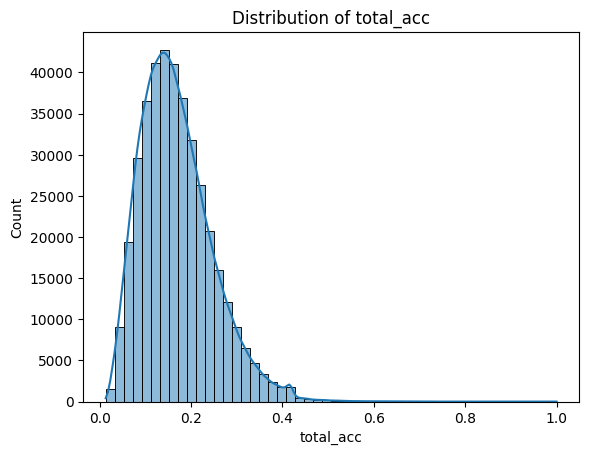

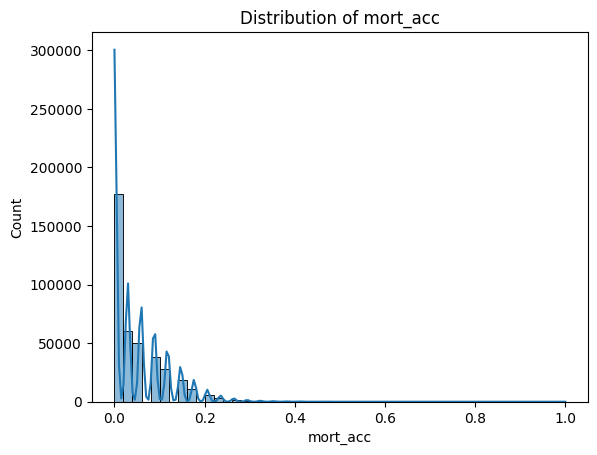

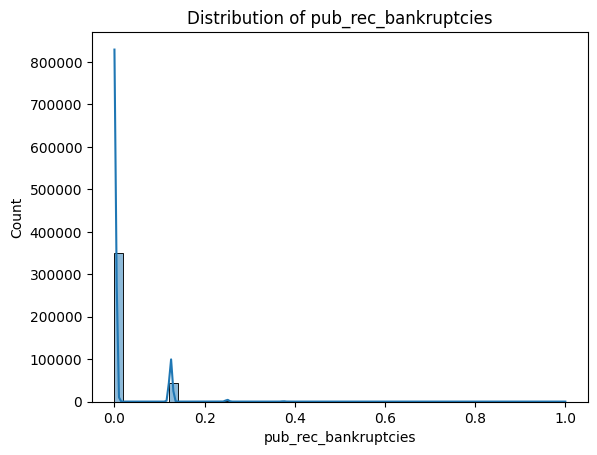

In [ ]:
for i in num_vars:
   # Create a new figure for each plot to avoid overlap
  plt.title('Distribution of {}'.format(i))
  sns.histplot(df[i] / df[i].max(), kde=True, bins=50,ax=plt.gca()) # Pass 'ax' parameter
  plt.show()


Insights

i Most of distributions are left skewed and outliers are present

In [ ]:
cat_vars = ['home_ownership', 'verification_status', 'loan_status', 'application_type', 'grade', 'sub_grade', 'term']


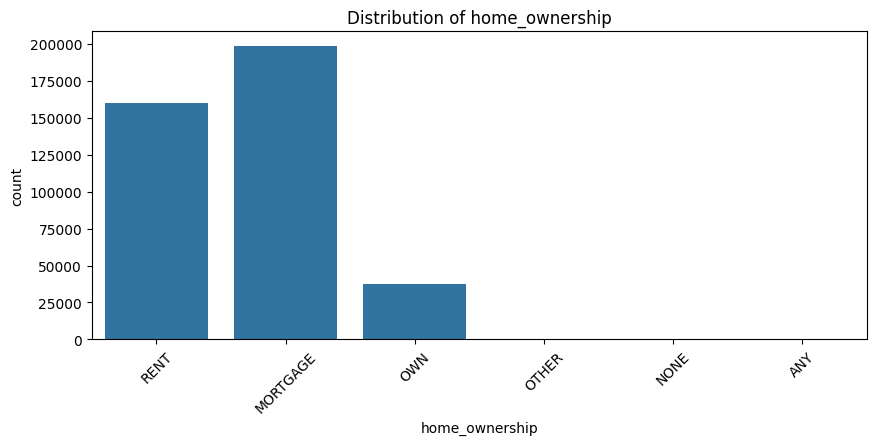

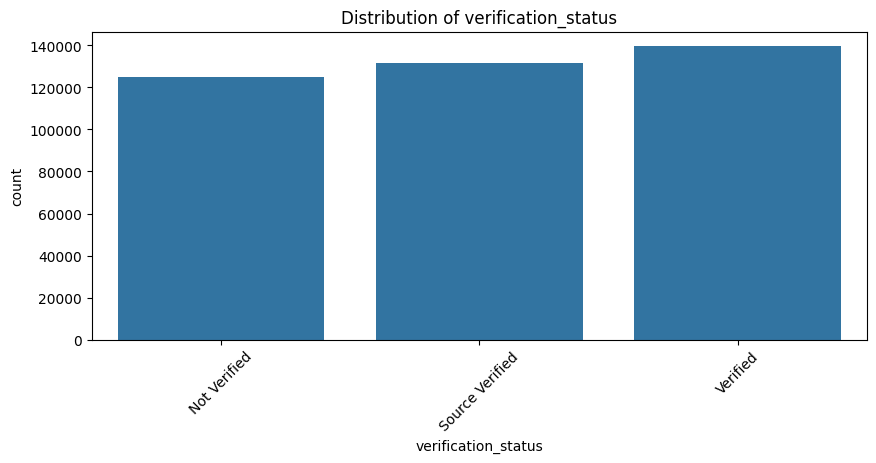

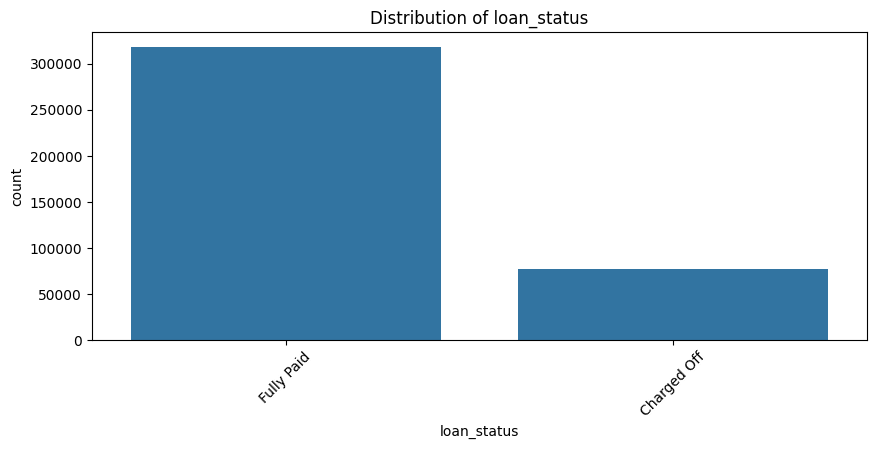

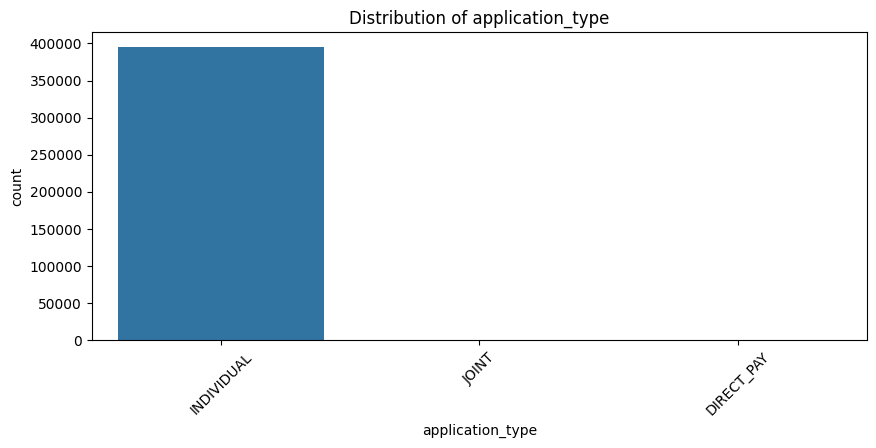

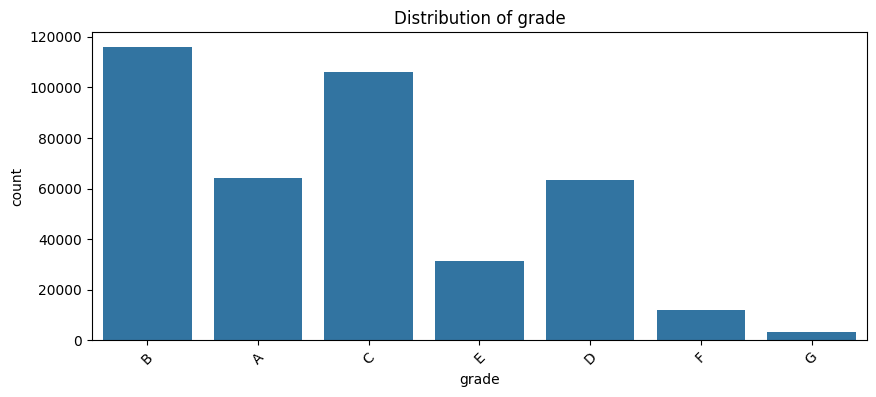

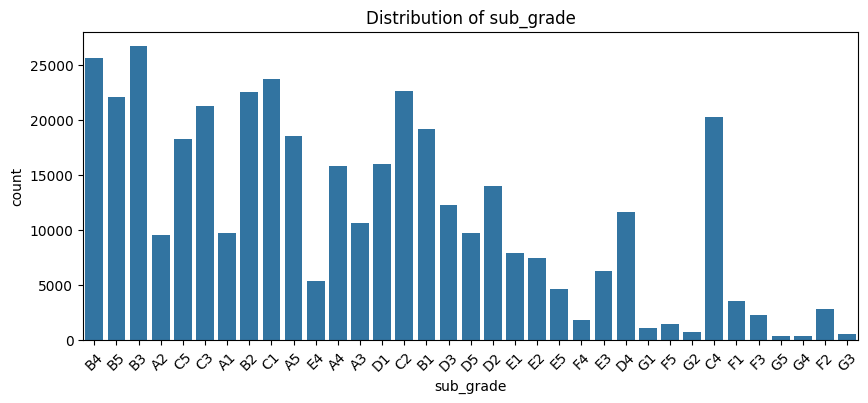

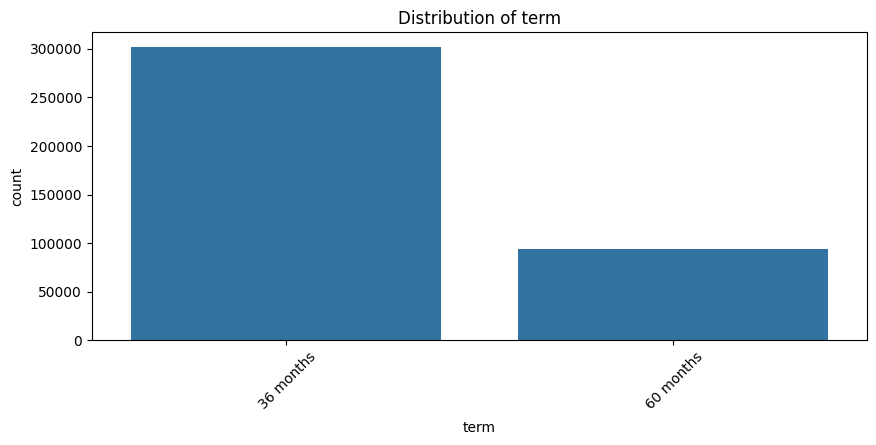

In [ ]:
for i in cat_vars:
    plt.figure(figsize=(10, 4))
    plt.title(f'Distribution of {i}')
    sns.countplot(data=df, x=i)
    plt.xticks(rotation = 45)
    plt.show()

Insights:

i Most home status is mortage

ii Most of there documents is verified status

iii Most of them have Paid loan completely

iv Most of applied are indivisual category

v Most of them fall in B grade for b3 subgrade

vi Most them availed loan for 36 months



# **Visualization - Bivariate Analysis**

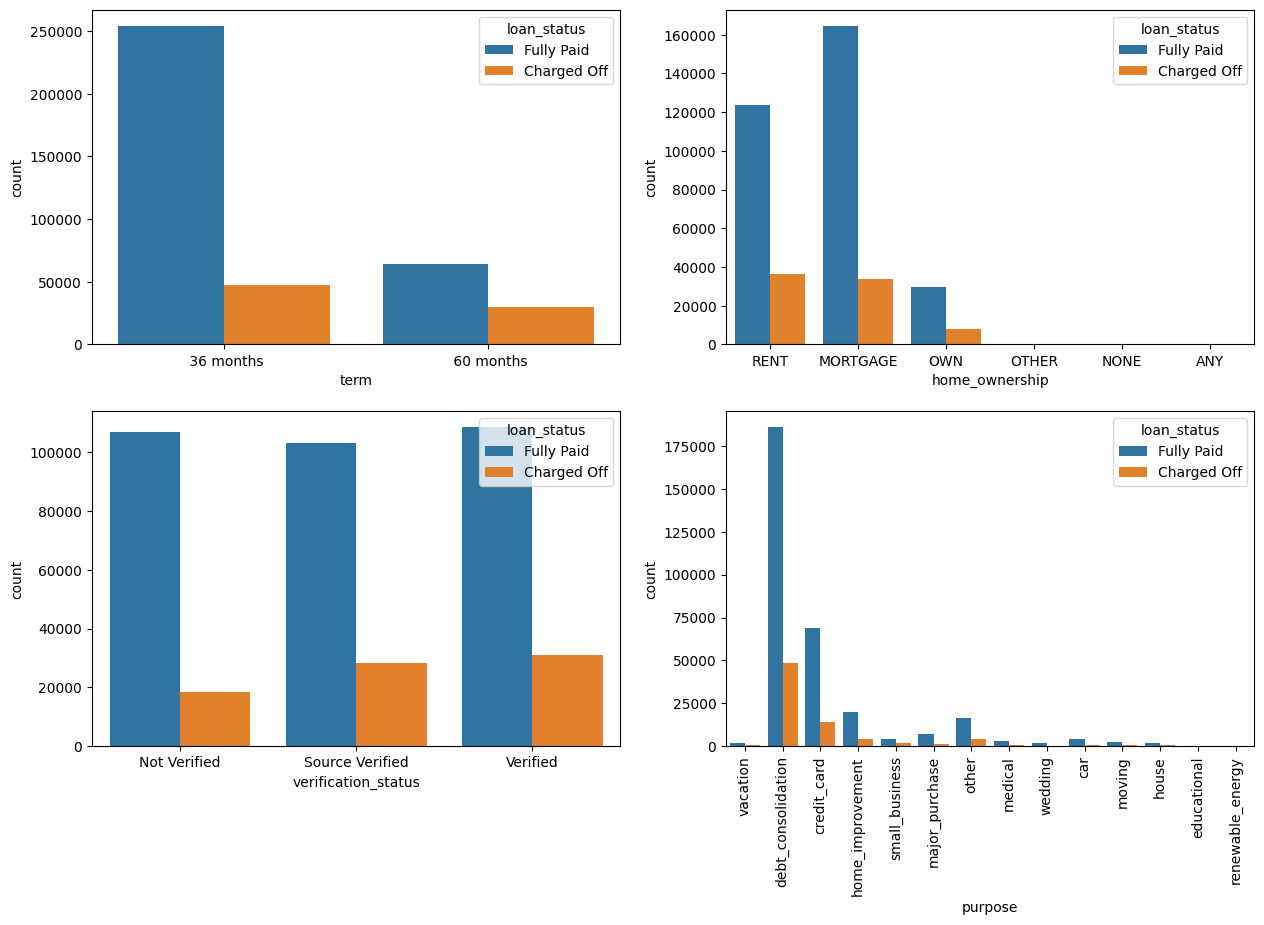

In [ ]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.countplot(x='term',data=df,hue='loan_status')

plt.subplot(4,2,2)
sns.countplot(x='home_ownership',data=df,hue='loan_status')

plt.subplot(4,2,3)
sns.countplot(x='verification_status',data=df,hue='loan_status')

plt.subplot(4,2,4)
g=sns.countplot(x='purpose',data=df,hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

Insights

i Most of the people took loan for 36 months and full paid on time

ii Most of people have home ownership as mortgage and rent

iii Most of the people took loan for debt consolidations


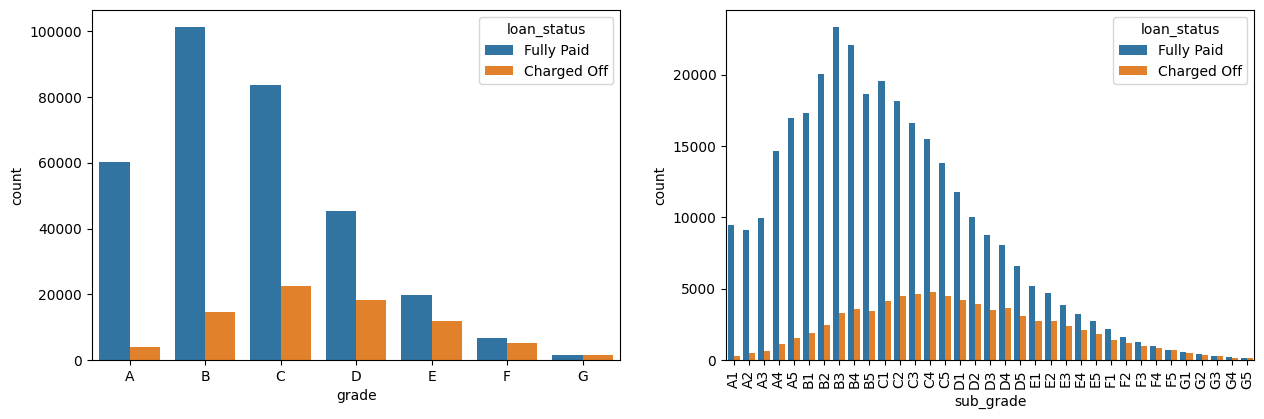

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.show()

Insights

i Manager and Teacher are the most afforded loan on titles

ii Person who employed for more than 10 years has successfully paid of the loan

# **Correlation Analysis**

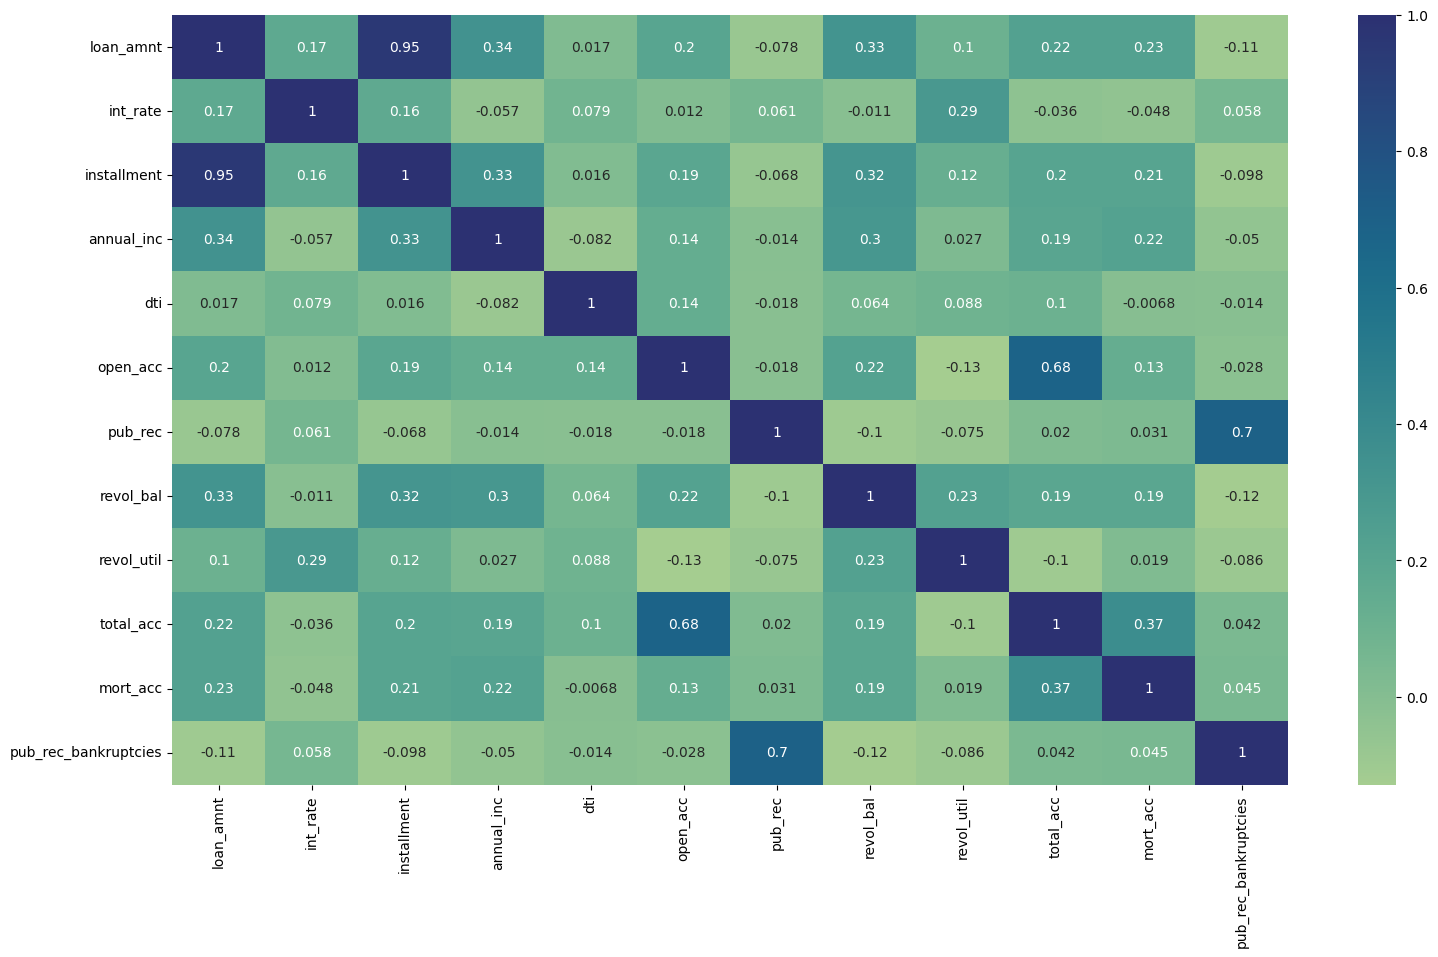

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(numeric_only=True), cmap = 'crest', annot = True)

plt.show()

Insights

i We noticed almost perfect correlation between "loan_amnt" the "installment" feature

hence droping installment

In [ ]:
df.drop('installment',axis=1,inplace=True)

To Check Outlier we are plotting the Box plot

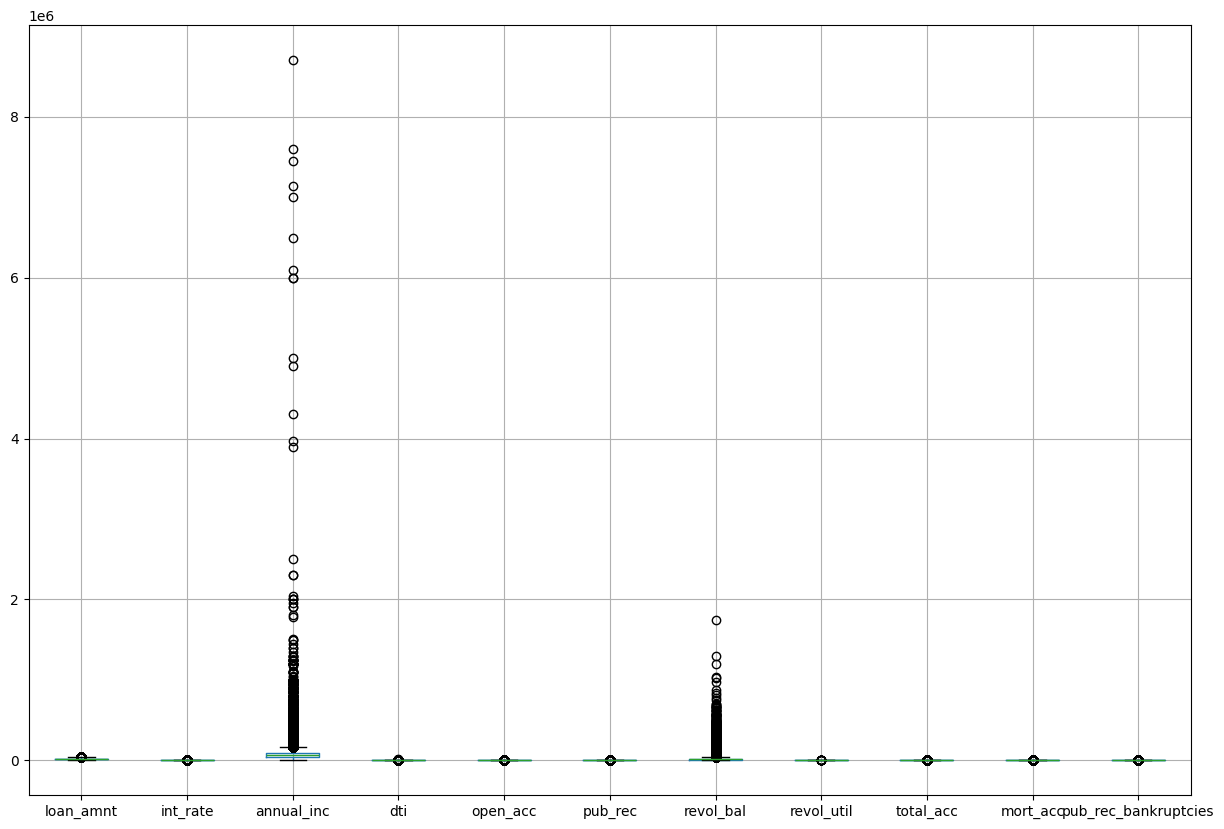

In [ ]:
df.boxplot(figsize=(15,10))
plt.show()

Insights

i we can notice lot of outliers in annual income

ii  we can notice total revol balance also containg outliers

# **Feature Engineering**

In [ ]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number


def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [ ]:
df['pub_rec']=df.pub_rec.apply(pub_rec)
df['mort_acc']=df.mort_acc.apply(mort_acc)
df['pub_rec_bankruptcies']=df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

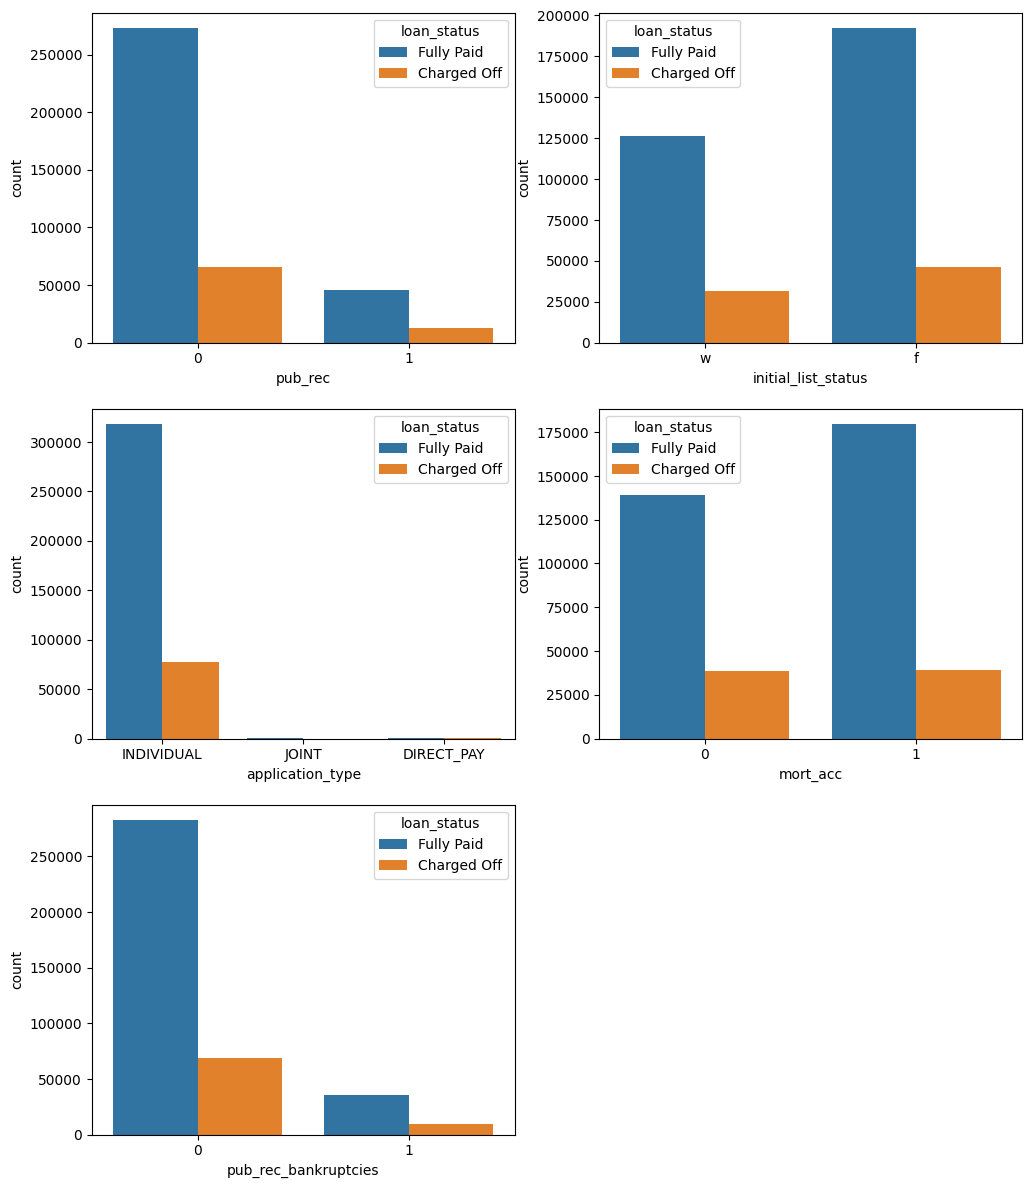

In [ ]:
plt.figure(figsize=(12,30))

plt.subplot(6,2,1)
sns.countplot(x='pub_rec',data=df,hue='loan_status')

plt.subplot(6,2,2)
sns.countplot(x='initial_list_status',data=df,hue='loan_status')

plt.subplot(6,2,3)
sns.countplot(x='application_type',data=df,hue='loan_status')

plt.subplot(6,2,4)
sns.countplot(x='mort_acc',data=df,hue='loan_status')

plt.subplot(6,2,5)
sns.countplot(x='pub_rec_bankruptcies',data=df,hue='loan_status')

plt.show()

Insights

i Most the loan disbursed to the people whose do not hold bankrupties record have successfully paid loan

Duplicate Value Check

In [ ]:
df.duplicated().sum()

np.int64(0)

Missing Values

In [ ]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
grade,0
sub_grade,0
emp_title,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0


## Missing Value Treatment

In [ ]:
# Convert 'term' column to numeric if it represents loan duration in months
df['term_months'] = df['term'].str.extract('(\d+)').astype(float)

# Now group by 'total_acc' and calculate the mean of numeric columns
df.groupby(by='total_acc').mean(numeric_only=True)

In [ ]:
# Convert 'term' column to numeric, handling potential errors:
df['term_months'] = pd.to_numeric(df['term'].str.extract('(\d+)', expand=False), errors='coerce')

# Now group by 'total_acc' and calculate the mean of numeric columns
total_acc_avg = df.groupby(by='total_acc').mean(numeric_only=True)['mort_acc']  # Select 'mort_acc' after calculating the mean

# ... (rest of your code remains the same)

In [ ]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
grade,0
sub_grade,0
emp_title,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0


Insights

i Dataset is very large so we can drop the rows with null values

In [ ]:
# Dropping rows with null values
df.dropna(inplace=True)
# Remaining no. of rows
df.shape

(396030, 27)

Outlier Detection

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'term_months'],
      dtype='object')


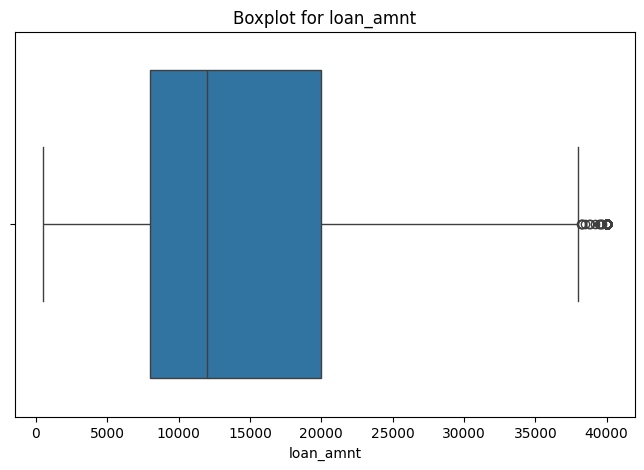

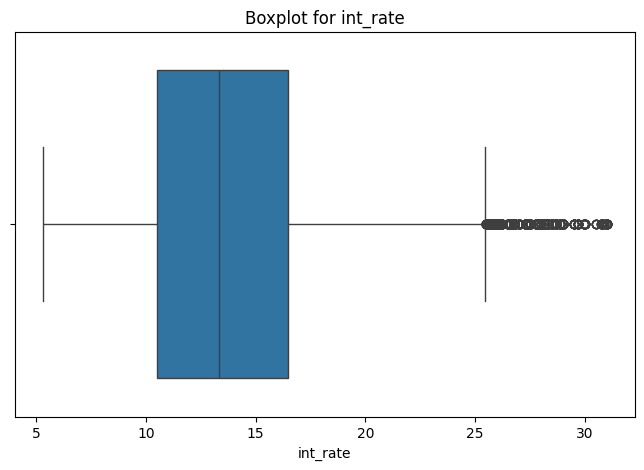

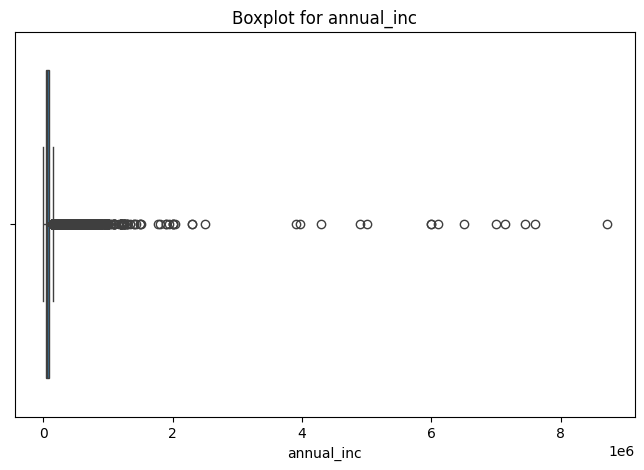

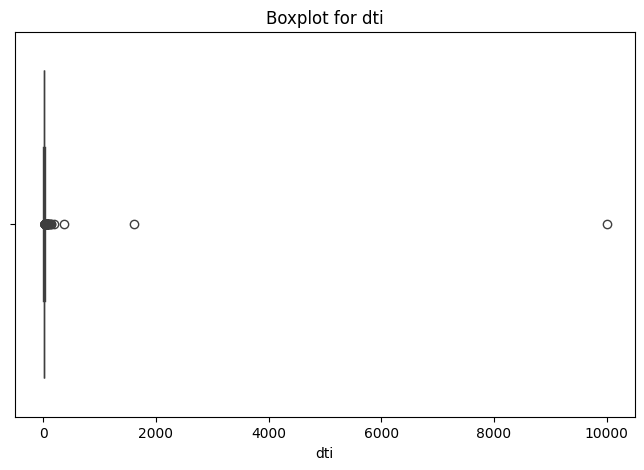

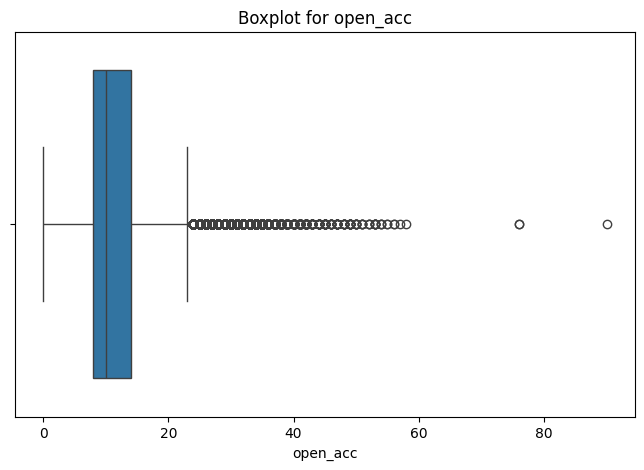

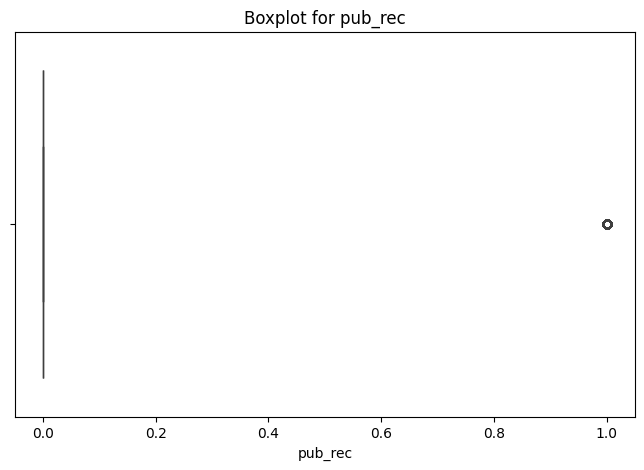

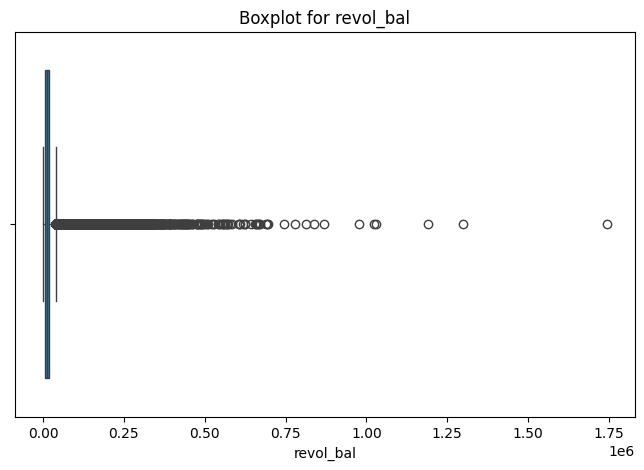

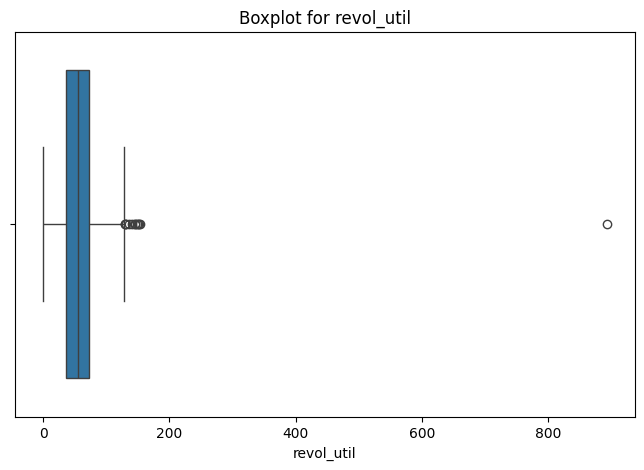

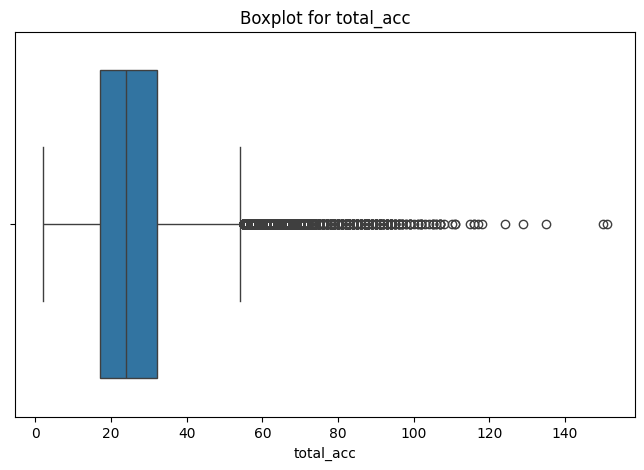

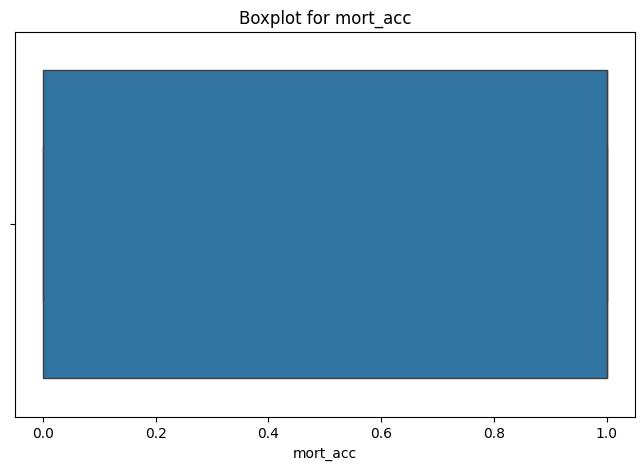

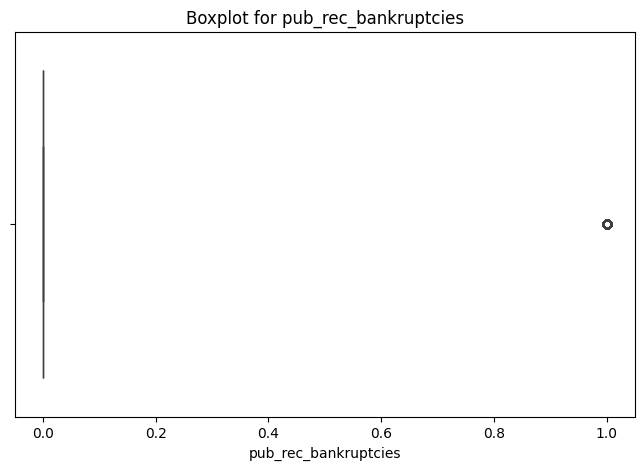

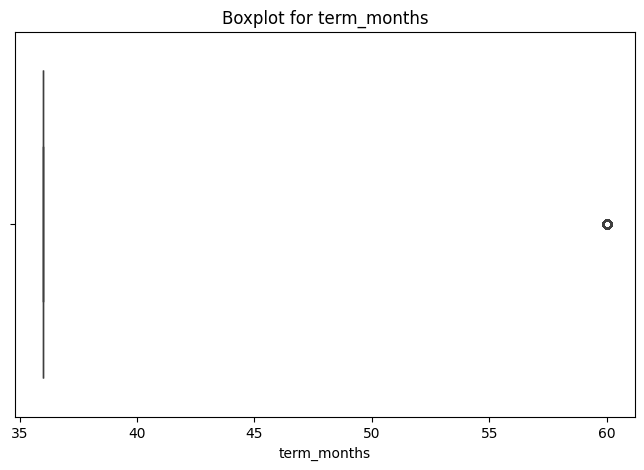

In [ ]:
# Verify that the column 'installment' exists in the DataFrame
print(df.columns)

# Recreate num_vars to include only existing columns of the updated DataFrame.
num_vars = df.select_dtypes(include=['number']).columns

def box_plot(col):
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col])
    plt.title('Boxplot for {}'.format(col))
    plt.show()

for col in num_vars:
    box_plot(col)

**Outlier Treatment**

In [ ]:
for col in num_vars:
    mean=df[col].mean()
    std=df[col].std()

    upper_limit=mean+3*std
    lower_limit=mean-3*std

    df=df[(df[col]<upper_limit) & (df[col]>lower_limit)]

df.shape

(378968, 27)

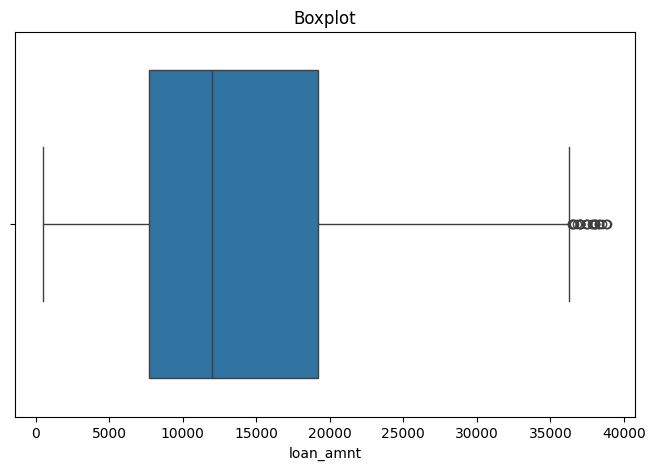

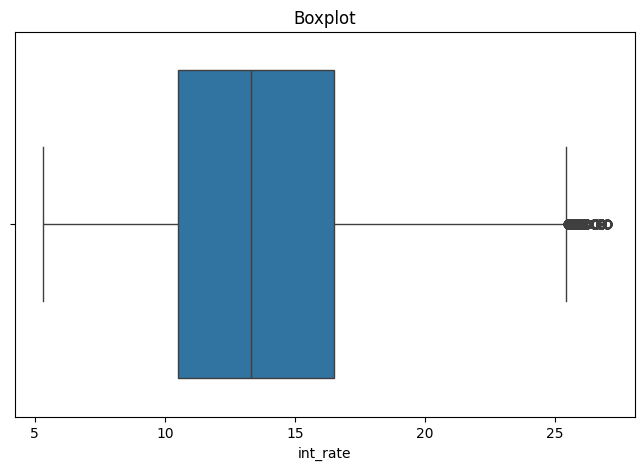

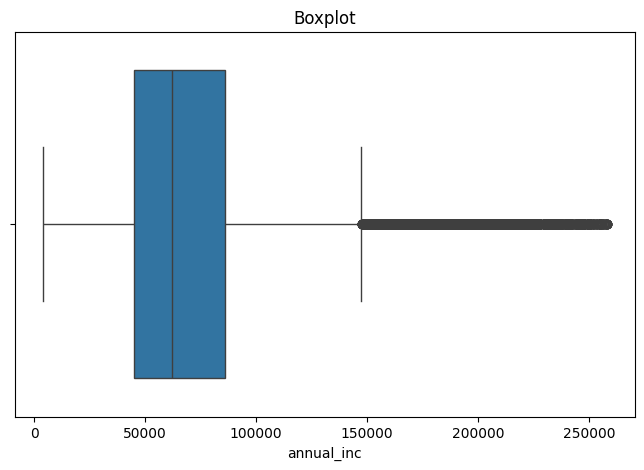

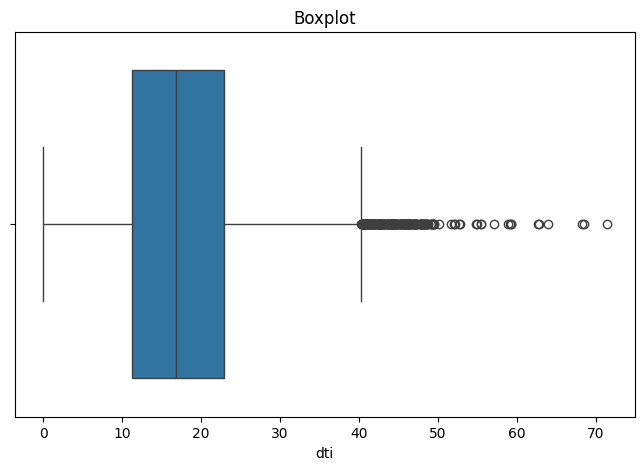

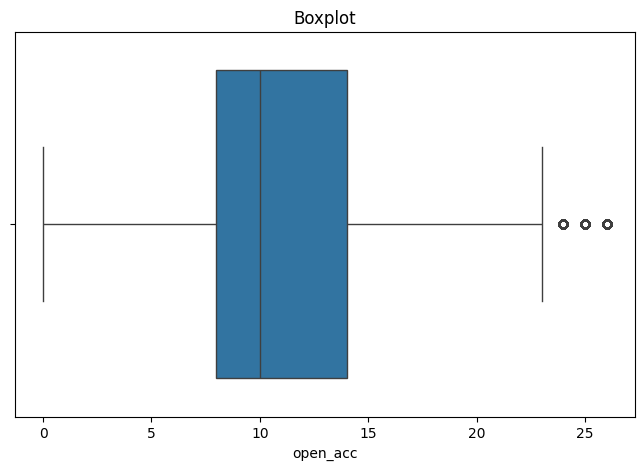

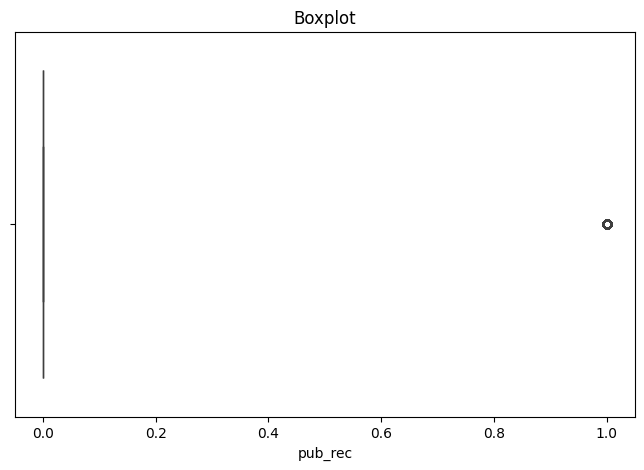

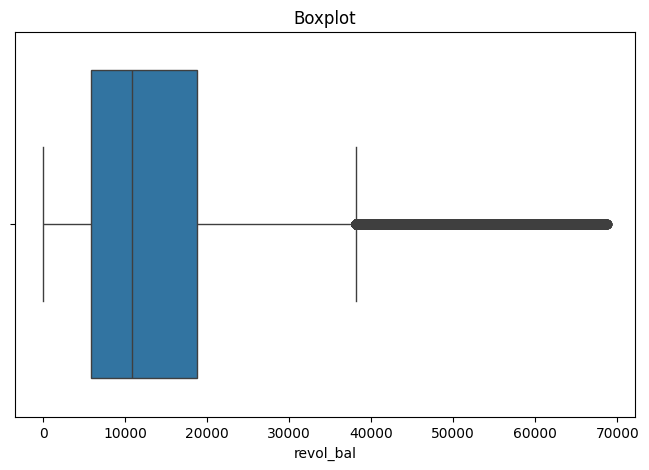

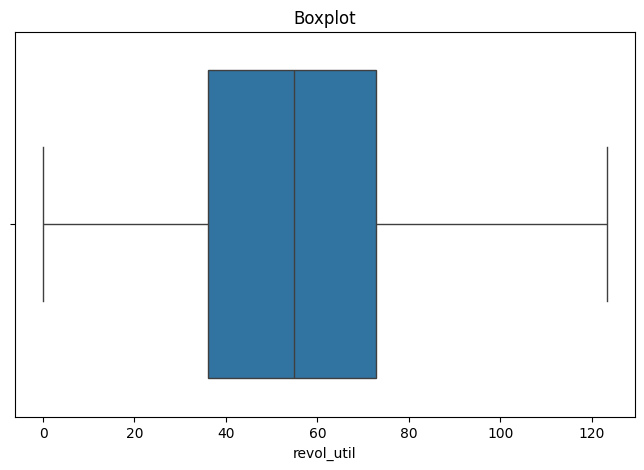

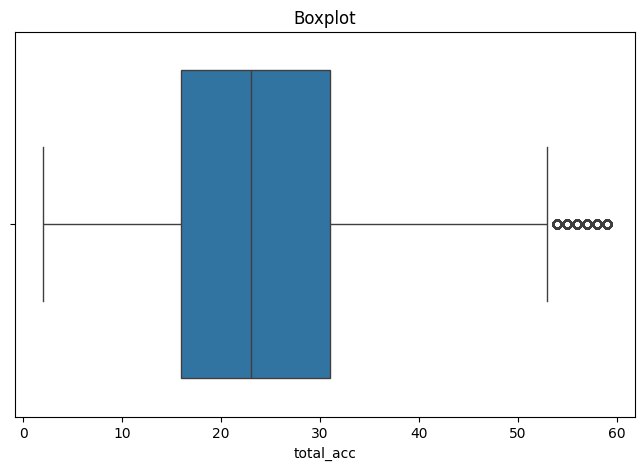

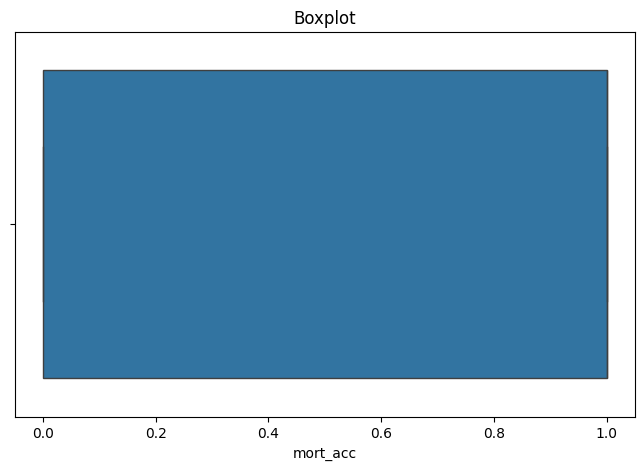

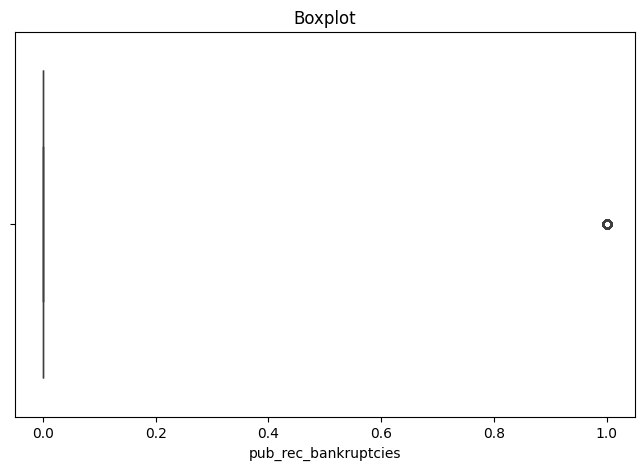

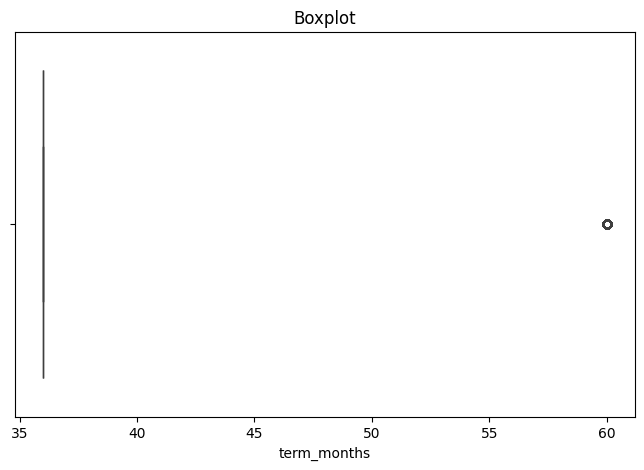

In [ ]:
def box_plot(col):
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col])
    plt.title('Boxplot')
    plt.show()

for col in num_vars:
    box_plot(col)

In [ ]:
# Converting term values to numerical val
term_values={' 36 months': 36, ' 60 months':60}
df['term'] = df.term.map(term_values)

# Mapping the target variable
df['loan_status']=df.loan_status.map({'Fully Paid':0, 'Charged Off':1})

# Initial List Status
df['initial_list_status'].unique()
np.array(['w', 'f'], dtype=object)
list_status = {'w': 0, 'f': 1}
df['initial_list_status'] = df.initial_list_status.map(list_status)

# Let's fetch ZIP from address and then drop the remaining details -
df['zip_code'] = df.address.apply(lambda x: x[-5:])
df['zip_code'].value_counts(normalize=True)*100

In [ ]:
df.drop(columns=['issue_d', 'emp_title', 'title', 'sub_grade',
                   'address', 'earliest_cr_line', 'emp_length'],
                   axis=1, inplace=True)

# **One hot encoding**

In [ ]:
dummies=['purpose', 'zip_code', 'grade', 'verification_status', 'application_type', 'home_ownership']
df=pd.get_dummies(df,columns=dummies,drop_first=True)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# **Data processing for modelling**

In [ ]:
from sklearn.model_selection import train_test_split

X=df.drop('loan_status',axis=1)
y=df['loan_status']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,stratify=y,random_state=42)
print(X_train.shape)
print(X_test.shape)

(265277, 51)
(113691, 51)


In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Model Building**

In [ ]:
loan=LogisticRegression()
loan.fit(X_train,y_train)

LogisticRegression()

In [ ]:
pd.Series((zip(X.columns, loan.coef_[0])))

In [ ]:
y_pred = loan.predict(X_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(loan.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.889


# **Confusion Matrix**

In [ ]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay
)

[[90767   586]
 [12026 10312]]


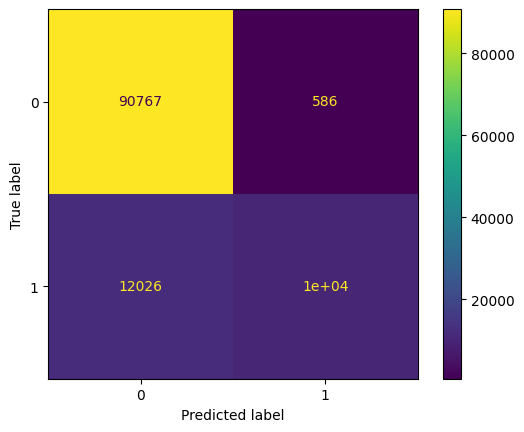

In [ ]:
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=loan.classes_).plot()

Insights

There is significant value for false negative and false positive. Which will hamper our prediction due to type-1 or type-2 error

# **Classification Report**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.94     91353
           1       0.95      0.46      0.62     22338

    accuracy                           0.89    113691
   macro avg       0.91      0.73      0.78    113691
weighted avg       0.90      0.89      0.87    113691



Insights

i Precision score and recall score for full paid status is almost same indicates that model is doing decent job which correctly classified the both of the scenarios

ii Precision score for charged off status is more than recall score which is perfect

# **ROC / AUC**

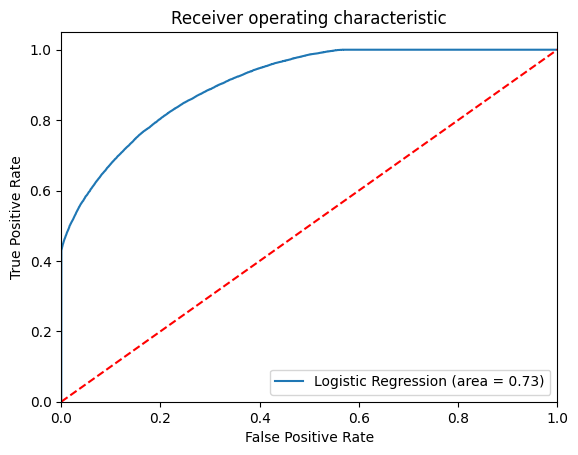

In [ ]:
logit_roc_auc=roc_auc_score(y_test,loan.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,loan.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Insights

i ROC-AUC curve is grossing the area near about 0.73 which indicates that model is performing well.

ii There is still room for some model improvement

iii By collecting more data, using a more complex model, or tuning the hyperparameters, it is possible to improve the model's performance.

# **Precision-Recall Curve**

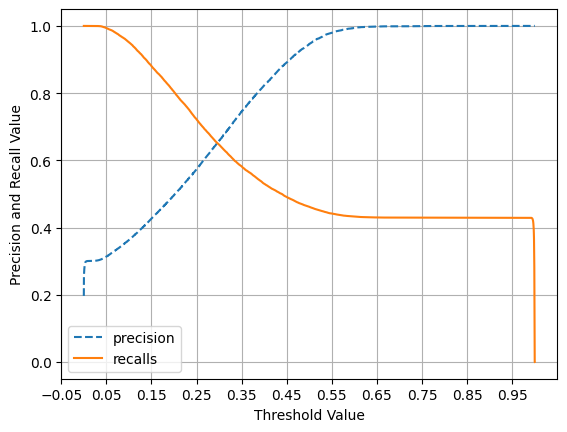

In [ ]:
def precission_recall_curve_plot(y_test,pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    #plot precision
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    #plot recall
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recalls')

    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))

    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()

precission_recall_curve_plot(y_test,loan.predict_proba(X_test)[:,1])

Insights

i Precision score is highest at 0.55 threshold. High precision value indicates that model is positevly predicating the charged off loan status which helps business to take more stable decision.

ii. Recall score is higher on smaller threshold but after 0.55 the recall value is constant. Model is correctly classifying the actual predicated values as instances.


## **# Assumption of Log. Reg. (Multicollinearity Check)**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

In [ ]:
def calc_vif(X):
    # Calculating the VIF
    vif=pd.DataFrame()
    vif['Feature']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [ ]:
X=scaler.fit_transform(X)

kfold=KFold(n_splits=5)
accuracy=np.mean(cross_val_score(loan,X,y,cv=kfold,scoring='accuracy',n_jobs=-1))
print("Cross Validation accuracy : {:.3f}".format(accuracy))

Cross Validation accuracy : 0.889


Insights

Cross Validation accuracy and testing accuracy is almost same which infers model is performing the decent job.

# Oversampling using SMOTE


In [ ]:
sm=SMOTE(random_state=42)
X_train_res,y_train_res=sm.fit_resample(X_train,y_train.ravel())


In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (426310, 51)
After OverSampling, the shape of train_y: (426310,) 

After OverSampling, counts of label '1': 213155
After OverSampling, counts of label '0': 213155


In [ ]:
lr1 = LogisticRegression(max_iter=1000)
lr1.fit(X_train_res, y_train_res)
predictions = lr1.predict(X_test)

# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86     91353
           1       0.49      0.81      0.61     22338

    accuracy                           0.80    113691
   macro avg       0.72      0.80      0.74    113691
weighted avg       0.86      0.80      0.81    113691



Insights

After making the dataset balanced, the precision and recall score are same as imbalanced dataset. But the accuracy dropped.
There is still room for improvement.

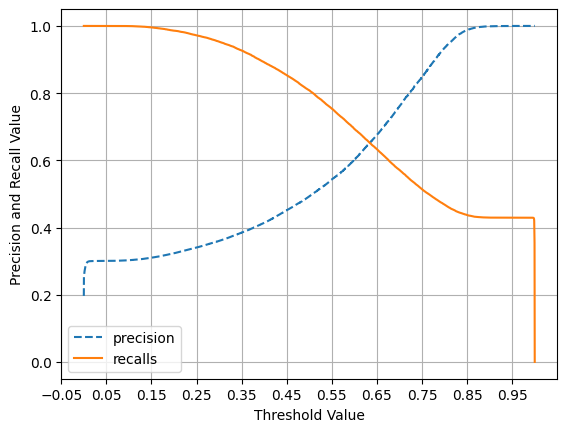

In [ ]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr1.predict_proba(X_test)[:,1])

Insights

After balancing the dataset, there is significant change observed in the precion and recall score for both of the classes.

Precision score is .95 and .49 for full paid and charged off respectively.

# **Tradeoff Questions¶**


i How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

Answer - Since data is imbalances by making the data balance we can try to avoid false positives. For evaluation metrics, we should be focusing on the macro average f1-score because we don't want to make false positive prediction and at the same we want to detect the defualers.


ii Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone

Answer - Below are the most features and their importance while making the prediction. So these variables can help the managers to identify which are customers who are more likely to pay the loan amount fully,

# **Actional Insights and Recommendations¶**


i 80% of the customers have paid the loan fully.

ii 20% of the customers are the defaulters.

iii The organization can the trained model to make prediction for whether a person will likely to pay the loan amount or he will be a defaulter.

iv Model achieves the 94% f1-score for the negative class (Fully Paid).

v Model achieves the 62% f1-score for the positive class (Charged off).

vi Cross Validation accuracy and testing accuracy is almost same which infers model is performing the decent job. We can trust this model for unseen data

vii By collecting more data, using a more complex model, or tuning the hyperparameters, it is possible to improve the model's performance.

viii ROC AUC curve area of 0.73, the model is correctly classifying about 73% of the instances.

ix This is a good performance, but there is still room for improvement.

X The precision-recall curve allows us to see how the precision and recall trade-off as we vary the threshold. A higher threshold will result in higher precision, but lower recall, and vice versa. The ideal point on the curve is the one that best meets the needs of the specific application.

XI After balancing the dataset, there is significant change observed in the precion and recall score for both of the classes.
Accuracy of Logistic Regression Classifier on test set: 0.891 which is decent and not by chance.
